In [259]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
import tensorflow as tf

import keras_tuner as kt
import random

In [260]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import log_loss, precision_score, roc_auc_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve
from sklearn.tree import plot_tree


In [261]:
df_insurance_claims = pd.read_csv("./Insurance_claims.csv")

## Data Pre-processing

In [262]:
df_insurance_claims.head()

,ReferenceId,PolicyholderNumber,FirstPartyVehicleNumber,ThirdPartyVehicleNumber,InsurerNotes,PolicyholderOccupation,LossDate,FirstPolicySubscriptionDate,ClaimCause,ClaimInvolvedCovers,...,NumberOfPoliciesOfPolicyholder,FpVehicleAgeMonths,EasinessToStage,ClaimWihoutIdentifiedThirdParty,ClaimAmount,LossHour,PolicyHolderAge,NumberOfBodilyInjuries,FirstPartyLiability,Fraud
0,4842,531112,715507.0,NaN,avoids a cat and hits a garage pole With deduc...,CivilServant,1/2/19,6/18/18,CollisionWithAnimal,MaterialDamages ActLiability,...,1,104.0,0.25,1,4624.73,8.0,45.0,0,1.0,0
1,4844,87170,71164.0,NaN,accident only expert contacts us to inform us ...,Worker,1/2/19,6/29/17,LossOfControl,MaterialDamages ActLiability,...,3,230.0,0.50,1,1606.81,11.0,20.0,0,1.0,0
2,4848,98706,442609.0,NaN,ae Miss/ for garage change A/ setting up EAD/ ...,Worker,1/2/19,2/5/17,AccidentWithIdentifiedThirdParty,MaterialDamages ActLiability,...,9,93.0,0.25,0,998.20,18.0,32.0,0,0.5,0
3,4849,38240,24604.0,NaN,"awaiting report to determine rc, no box checke...",CivilServant,1/2/19,1/21/17,AccidentWithIdentifiedThirdParty,MaterialDamages ActLiability ReplacementVehicle,...,2,56.0,0.25,0,2506.92,11.0,46.0,0,0.5,0
4,4850,11339,2933.0,229134.0,Insured in THIRD-PARTY formula Insured in a su...,Farmer,1/2/19,1/13/18,AccidentWithIdentifiedThirdParty,ActLiability,...,4,110.0,0.25,0,12.00,12.0,28.0,0,0.0,0


In [263]:
df_insurance_claims.isna().sum()

ReferenceId                            0
PolicyholderNumber                     0
FirstPartyVehicleNumber              495
ThirdPartyVehicleNumber            11151
InsurerNotes                        2357
PolicyholderOccupation               343
LossDate                               0
FirstPolicySubscriptionDate            0
ClaimCause                           197
ClaimInvolvedCovers                  195
DamageImportance                   10792
FirstPartyVehicleType                 12
ConnectionBetweenParties           11432
LossPostCode                        1408
PolicyHolderPostCode                   0
PolicyWasSubscribedOnInternet          0
NumberOfPoliciesOfPolicyholder         0
FpVehicleAgeMonths                    12
EasinessToStage                        0
ClaimWihoutIdentifiedThirdParty        0
ClaimAmount                            0
LossHour                              94
PolicyHolderAge                       36
NumberOfBodilyInjuries                 0
FirstPartyLiabil

In [264]:
# Checking the correlations of Fraud status with other features
df_insurance_claims.corr(method ='pearson')

/var/folders/4c/6jy3z6sn7zg_n_24fwj6v_xw0000gn/T/ipykernel_24159/943198488.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_insurance_claims.corr(method ='pearson')


,ReferenceId,PolicyholderNumber,FirstPartyVehicleNumber,ThirdPartyVehicleNumber,PolicyWasSubscribedOnInternet,NumberOfPoliciesOfPolicyholder,FpVehicleAgeMonths,EasinessToStage,ClaimWihoutIdentifiedThirdParty,ClaimAmount,LossHour,PolicyHolderAge,NumberOfBodilyInjuries,FirstPartyLiability,Fraud
ReferenceId,1.000000,0.209116,0.282068,0.271636,-0.008110,0.012979,-0.002980,0.105193,0.104887,-0.065860,-0.054491,0.021388,-0.058762,-0.076372,-0.045789
PolicyholderNumber,0.209116,1.000000,0.793369,0.327929,0.190479,-0.329618,-0.018123,0.023667,-0.007363,0.042668,-0.025072,0.112914,-0.025922,-0.009534,0.022482
FirstPartyVehicleNumber,0.282068,0.793369,1.000000,0.404662,0.196522,-0.223095,-0.026850,0.021291,-0.002183,0.042396,-0.020693,0.085038,-0.026183,-0.021531,0.016646
ThirdPartyVehicleNumber,0.271636,0.327929,0.404662,1.000000,0.157980,-0.193787,0.095110,-0.036111,0.033128,0.065934,-0.130910,-0.015475,0.027601,-0.099609,-0.031976
PolicyWasSubscribedOnInternet,-0.008110,0.190479,0.196522,0.157980,1.000000,-0.186533,-0.004952,-0.047005,-0.056639,-0.014952,0.017985,-0.141683,0.001283,0.008203,0.024539
NumberOfPoliciesOfPolicyholder,0.012979,-0.329618,-0.223095,-0.193787,-0.186533,1.000000,0.034848,0.012080,0.036546,-0.020861,0.000018,-0.026783,0.013496,-0.031755,-0.036993
FpVehicleAgeMonths,-0.002980,-0.018123,-0.026850,0.095110,-0.004952,0.034848,1.000000,-0.015185,-0.073045,-0.095881,-0.051787,-0.098667,0.027671,0.007863,0.004507
EasinessToStage,0.105193,0.023667,0.021291,-0.036111,-0.047005,0.012080,-0.015185,1.000000,0.702388,-0.161865,-0.453227,0.043831,-0.381293,-0.179213,-0.024864
ClaimWihoutIdentifiedThirdParty,0.104887,-0.007363,-0.002183,0.033128,-0.056639,0.036546,-0.073045,0.702388,1.000000,-0.140430,-0.405504,0.023612,-0.134350,-0.266417,-0.026088
ClaimAmount,-0.065860,0.042668,0.042396,0.065934,-0.014952,-0.020861,-0.095881,-0.161865,-0.140430,1.000000,0.159222,0.020991,0.181512,0.231267,0.083520


/var/folders/4c/6jy3z6sn7zg_n_24fwj6v_xw0000gn/T/ipykernel_24159/3239715344.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_insurance_claims.corr(), cmap="YlGnBu")


<AxesSubplot:>

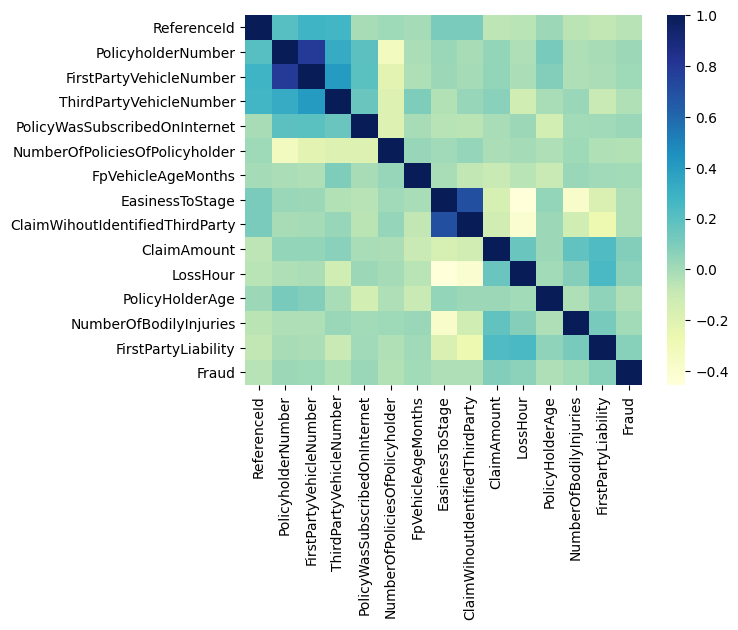

In [265]:
# Checking the correlations via the correlation heatmap
sns.heatmap(df_insurance_claims.corr(), cmap="YlGnBu")

In [266]:
df_insurance_claims["LossDate"] = pd.to_datetime(df_insurance_claims["LossDate"])
df_insurance_claims["FirstPolicySubscriptionDate"] = pd.to_datetime(df_insurance_claims["FirstPolicySubscriptionDate"])

In [267]:
df_insurance_claims["Days"] = df_insurance_claims["LossDate"] - df_insurance_claims["FirstPolicySubscriptionDate"]
df_insurance_claims["Days"] = pd.to_numeric(df_insurance_claims["Days"].dt.days, downcast='integer')

In [268]:
df_insurance_claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11530 entries, 0 to 11529
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   ReferenceId                      11530 non-null  int64         
 1   PolicyholderNumber               11530 non-null  int64         
 2   FirstPartyVehicleNumber          11035 non-null  float64       
 3   ThirdPartyVehicleNumber          379 non-null    float64       
 4   InsurerNotes                     9173 non-null   object        
 5   PolicyholderOccupation           11187 non-null  object        
 6   LossDate                         11530 non-null  datetime64[ns]
 7   FirstPolicySubscriptionDate      11530 non-null  datetime64[ns]
 8   ClaimCause                       11333 non-null  object        
 9   ClaimInvolvedCovers              11335 non-null  object        
 10  DamageImportance                 738 non-null    object   

In [269]:
df_insurance_claims = df_insurance_claims.astype({"Days": "int64"})

In [270]:
df_insurance_claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11530 entries, 0 to 11529
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   ReferenceId                      11530 non-null  int64         
 1   PolicyholderNumber               11530 non-null  int64         
 2   FirstPartyVehicleNumber          11035 non-null  float64       
 3   ThirdPartyVehicleNumber          379 non-null    float64       
 4   InsurerNotes                     9173 non-null   object        
 5   PolicyholderOccupation           11187 non-null  object        
 6   LossDate                         11530 non-null  datetime64[ns]
 7   FirstPolicySubscriptionDate      11530 non-null  datetime64[ns]
 8   ClaimCause                       11333 non-null  object        
 9   ClaimInvolvedCovers              11335 non-null  object        
 10  DamageImportance                 738 non-null    object   

We decided to drop these columns based on 3 main reasons: 
- Those are the unique numbers such as IDs (ReferenceID, PolicyholderNumber, FirstPartyVehicleNumber, ThirdPartyVehicleNumber, InsurerNotes)
- The columns have too many missing values (DamageImportance, ConnectionBetweenParties)
- The values are the postcodes of the addresses (LossPostCode, PolicyHolderPostCode)
- Dates (LossDate, FirstPolicySubscriptionDate)

In [271]:
# Remove the columns that have too many missing values and unnecessary comlumns such as Reference ID, PolicyHolderPostcode
df_insurance_claims = df_insurance_claims.drop(columns = ["ReferenceId", 
                                             "PolicyholderNumber", 
                                             "FirstPartyVehicleNumber",
                                             "ThirdPartyVehicleNumber",
                                             "InsurerNotes",
                                             "DamageImportance",
                                             "ConnectionBetweenParties",
                                             "LossPostCode",
                                             "PolicyHolderPostCode",
                                             "LossDate",
                                             "FirstPolicySubscriptionDate"
                                             ])

In [272]:
# Drop the duplicate rows
df_insurance_claims.drop_duplicates(inplace=True)
df_insurance_claims

,PolicyholderOccupation,ClaimCause,ClaimInvolvedCovers,FirstPartyVehicleType,PolicyWasSubscribedOnInternet,NumberOfPoliciesOfPolicyholder,FpVehicleAgeMonths,EasinessToStage,ClaimWihoutIdentifiedThirdParty,ClaimAmount,LossHour,PolicyHolderAge,NumberOfBodilyInjuries,FirstPartyLiability,Fraud,Days
0,CivilServant,CollisionWithAnimal,MaterialDamages ActLiability,Car,1,1,104.0,0.25,1,4624.73,8.0,45.0,0,1.0,0,198
1,Worker,LossOfControl,MaterialDamages ActLiability,Car,0,3,230.0,0.50,1,1606.81,11.0,20.0,0,1.0,0,552
2,Worker,AccidentWithIdentifiedThirdParty,MaterialDamages ActLiability,Car,0,9,93.0,0.25,0,998.20,18.0,32.0,0,0.5,0,696
3,CivilServant,AccidentWithIdentifiedThirdParty,MaterialDamages ActLiability ReplacementVehicle,Car,0,2,56.0,0.25,0,2506.92,11.0,46.0,0,0.5,0,711
4,Farmer,AccidentWithIdentifiedThirdParty,ActLiability,Car,0,4,110.0,0.25,0,12.00,12.0,28.0,0,0.0,0,354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11525,Employee,WindscreenDamage,Windscreen,Car,0,1,85.0,0.50,1,1010.23,0.0,56.0,0,0.0,0,705
11526,Employee,WindscreenDamage,Windscreen,Car,0,3,119.0,0.50,1,154.35,0.0,54.0,0,0.0,0,1326
11527,Employee,WindscreenDamage,Windscreen,Car,0,4,139.0,0.50,1,420.25,0.0,34.0,0,0.0,0,166
11528,CivilServant,WindscreenDamage,Windscreen,Car,0,6,105.0,0.50,1,96.40,0.0,58.0,0,0.0,0,799


In [273]:
# Compare the 2 Fraud statuses: 
#sns.pairplot(df_new, hue='Fraud')

#We can see from the plot that the dataset is unbalanced. 


In [274]:
#df_insurance_claims_t_days["Days"] = df_insurance_claims_t_days["LossDate"] - df_insurance_claims_t_days["FirstPolicySubscriptionDate"]
#df_insurance_claims_t_days["Days"] = pd.to_numeric(df_insurance_claims_t_days["Days"].dt.days, downcast='integer')

# Model 2: Decision Tree

### Pre-processing the dataset

In [275]:
# Have a glimpse at the dataset
df_insurance_claims

,PolicyholderOccupation,ClaimCause,ClaimInvolvedCovers,FirstPartyVehicleType,PolicyWasSubscribedOnInternet,NumberOfPoliciesOfPolicyholder,FpVehicleAgeMonths,EasinessToStage,ClaimWihoutIdentifiedThirdParty,ClaimAmount,LossHour,PolicyHolderAge,NumberOfBodilyInjuries,FirstPartyLiability,Fraud,Days
0,CivilServant,CollisionWithAnimal,MaterialDamages ActLiability,Car,1,1,104.0,0.25,1,4624.73,8.0,45.0,0,1.0,0,198
1,Worker,LossOfControl,MaterialDamages ActLiability,Car,0,3,230.0,0.50,1,1606.81,11.0,20.0,0,1.0,0,552
2,Worker,AccidentWithIdentifiedThirdParty,MaterialDamages ActLiability,Car,0,9,93.0,0.25,0,998.20,18.0,32.0,0,0.5,0,696
3,CivilServant,AccidentWithIdentifiedThirdParty,MaterialDamages ActLiability ReplacementVehicle,Car,0,2,56.0,0.25,0,2506.92,11.0,46.0,0,0.5,0,711
4,Farmer,AccidentWithIdentifiedThirdParty,ActLiability,Car,0,4,110.0,0.25,0,12.00,12.0,28.0,0,0.0,0,354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11525,Employee,WindscreenDamage,Windscreen,Car,0,1,85.0,0.50,1,1010.23,0.0,56.0,0,0.0,0,705
11526,Employee,WindscreenDamage,Windscreen,Car,0,3,119.0,0.50,1,154.35,0.0,54.0,0,0.0,0,1326
11527,Employee,WindscreenDamage,Windscreen,Car,0,4,139.0,0.50,1,420.25,0.0,34.0,0,0.0,0,166
11528,CivilServant,WindscreenDamage,Windscreen,Car,0,6,105.0,0.50,1,96.40,0.0,58.0,0,0.0,0,799


In [276]:
df_insurance_claims.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11516 entries, 0 to 11529
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   PolicyholderOccupation           11176 non-null  object 
 1   ClaimCause                       11325 non-null  object 
 2   ClaimInvolvedCovers              11327 non-null  object 
 3   FirstPartyVehicleType            11504 non-null  object 
 4   PolicyWasSubscribedOnInternet    11516 non-null  int64  
 5   NumberOfPoliciesOfPolicyholder   11516 non-null  int64  
 6   FpVehicleAgeMonths               11504 non-null  float64
 7   EasinessToStage                  11516 non-null  float64
 8   ClaimWihoutIdentifiedThirdParty  11516 non-null  int64  
 9   ClaimAmount                      11516 non-null  float64
 10  LossHour                         11422 non-null  float64
 11  PolicyHolderAge                  11480 non-null  float64
 12  NumberOfBodilyInju

In [277]:
df_insurance_claims.nunique()

PolicyholderOccupation               11
ClaimCause                           18
ClaimInvolvedCovers                  68
FirstPartyVehicleType                 4
PolicyWasSubscribedOnInternet         2
NumberOfPoliciesOfPolicyholder       17
FpVehicleAgeMonths                  388
EasinessToStage                       4
ClaimWihoutIdentifiedThirdParty       2
ClaimAmount                        8248
LossHour                             24
PolicyHolderAge                      73
NumberOfBodilyInjuries                6
FirstPartyLiability                   3
Fraud                                 2
Days                               1371
dtype: int64

In [278]:
df_insurance_claims.isna().sum()

PolicyholderOccupation             340
ClaimCause                         191
ClaimInvolvedCovers                189
FirstPartyVehicleType               12
PolicyWasSubscribedOnInternet        0
NumberOfPoliciesOfPolicyholder       0
FpVehicleAgeMonths                  12
EasinessToStage                      0
ClaimWihoutIdentifiedThirdParty      0
ClaimAmount                          0
LossHour                            94
PolicyHolderAge                     36
NumberOfBodilyInjuries               0
FirstPartyLiability                  0
Fraud                                0
Days                                 0
dtype: int64

In [279]:
# Removing the mising values
df_insurance_claims = df_insurance_claims[(df_insurance_claims.PolicyholderOccupation.notnull()) &
                                          (df_insurance_claims.ClaimCause.notnull()) &
                                          (df_insurance_claims.ClaimInvolvedCovers.notnull()) &
                                          (df_insurance_claims.FirstPartyVehicleType.notnull()) &
                                          (df_insurance_claims.FpVehicleAgeMonths.notnull()) &
                                          (df_insurance_claims.LossHour.notnull()) &
                                          (df_insurance_claims.PolicyHolderAge.notnull())
                                          ].reset_index()

In [280]:
df_insurance_claims_clean = df_insurance_claims.drop(columns = ["index"])
df_insurance_claims_clean

,PolicyholderOccupation,ClaimCause,ClaimInvolvedCovers,FirstPartyVehicleType,PolicyWasSubscribedOnInternet,NumberOfPoliciesOfPolicyholder,FpVehicleAgeMonths,EasinessToStage,ClaimWihoutIdentifiedThirdParty,ClaimAmount,LossHour,PolicyHolderAge,NumberOfBodilyInjuries,FirstPartyLiability,Fraud,Days
0,CivilServant,CollisionWithAnimal,MaterialDamages ActLiability,Car,1,1,104.0,0.25,1,4624.73,8.0,45.0,0,1.0,0,198
1,Worker,LossOfControl,MaterialDamages ActLiability,Car,0,3,230.0,0.50,1,1606.81,11.0,20.0,0,1.0,0,552
2,Worker,AccidentWithIdentifiedThirdParty,MaterialDamages ActLiability,Car,0,9,93.0,0.25,0,998.20,18.0,32.0,0,0.5,0,696
3,CivilServant,AccidentWithIdentifiedThirdParty,MaterialDamages ActLiability ReplacementVehicle,Car,0,2,56.0,0.25,0,2506.92,11.0,46.0,0,0.5,0,711
4,Farmer,AccidentWithIdentifiedThirdParty,ActLiability,Car,0,4,110.0,0.25,0,12.00,12.0,28.0,0,0.0,0,354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10884,Employee,WindscreenDamage,Windscreen,Car,0,1,85.0,0.50,1,1010.23,0.0,56.0,0,0.0,0,705
10885,Employee,WindscreenDamage,Windscreen,Car,0,3,119.0,0.50,1,154.35,0.0,54.0,0,0.0,0,1326
10886,Employee,WindscreenDamage,Windscreen,Car,0,4,139.0,0.50,1,420.25,0.0,34.0,0,0.0,0,166
10887,CivilServant,WindscreenDamage,Windscreen,Car,0,6,105.0,0.50,1,96.40,0.0,58.0,0,0.0,0,799


In [281]:
df_insurance_claims_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10889 entries, 0 to 10888
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   PolicyholderOccupation           10889 non-null  object 
 1   ClaimCause                       10889 non-null  object 
 2   ClaimInvolvedCovers              10889 non-null  object 
 3   FirstPartyVehicleType            10889 non-null  object 
 4   PolicyWasSubscribedOnInternet    10889 non-null  int64  
 5   NumberOfPoliciesOfPolicyholder   10889 non-null  int64  
 6   FpVehicleAgeMonths               10889 non-null  float64
 7   EasinessToStage                  10889 non-null  float64
 8   ClaimWihoutIdentifiedThirdParty  10889 non-null  int64  
 9   ClaimAmount                      10889 non-null  float64
 10  LossHour                         10889 non-null  float64
 11  PolicyHolderAge                  10889 non-null  float64
 12  NumberOfBodilyInju

In [282]:
df_insurance_claims_clean[["PolicyholderOccupation","ClaimCause","ClaimInvolvedCovers","FirstPartyVehicleType"]]

,PolicyholderOccupation,ClaimCause,ClaimInvolvedCovers,FirstPartyVehicleType
0,CivilServant,CollisionWithAnimal,MaterialDamages ActLiability,Car
1,Worker,LossOfControl,MaterialDamages ActLiability,Car
2,Worker,AccidentWithIdentifiedThirdParty,MaterialDamages ActLiability,Car
3,CivilServant,AccidentWithIdentifiedThirdParty,MaterialDamages ActLiability ReplacementVehicle,Car
4,Farmer,AccidentWithIdentifiedThirdParty,ActLiability,Car
...,...,...,...,...
10884,Employee,WindscreenDamage,Windscreen,Car
10885,Employee,WindscreenDamage,Windscreen,Car
10886,Employee,WindscreenDamage,Windscreen,Car
10887,CivilServant,WindscreenDamage,Windscreen,Car


In [283]:
df_insurance_claims_clean = pd.get_dummies(df_insurance_claims_clean , drop_first=True, columns=["PolicyholderOccupation","ClaimCause","ClaimInvolvedCovers","FirstPartyVehicleType"])
df_insurance_claims_clean

,PolicyWasSubscribedOnInternet,NumberOfPoliciesOfPolicyholder,FpVehicleAgeMonths,EasinessToStage,ClaimWihoutIdentifiedThirdParty,ClaimAmount,LossHour,PolicyHolderAge,NumberOfBodilyInjuries,FirstPartyLiability,...,ClaimInvolvedCovers_Windscreen ActLiability NaturalCatastrophes,ClaimInvolvedCovers_Windscreen ActLiability Theft,ClaimInvolvedCovers_Windscreen ActLiability Theft ReplacementVehicle,ClaimInvolvedCovers_Windscreen MaterialDamages,ClaimInvolvedCovers_Windscreen MaterialDamages ActLiability,ClaimInvolvedCovers_Windscreen NaturalCatastrophes,ClaimInvolvedCovers_Windscreen Theft,FirstPartyVehicleType_Caravan,FirstPartyVehicleType_Motorcycle,FirstPartyVehicleType_PrivateCar
0,1,1,104.0,0.25,1,4624.73,8.0,45.0,0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,0,3,230.0,0.50,1,1606.81,11.0,20.0,0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,0,9,93.0,0.25,0,998.20,18.0,32.0,0,0.5,...,0,0,0,0,0,0,0,0,0,0
3,0,2,56.0,0.25,0,2506.92,11.0,46.0,0,0.5,...,0,0,0,0,0,0,0,0,0,0
4,0,4,110.0,0.25,0,12.00,12.0,28.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10884,0,1,85.0,0.50,1,1010.23,0.0,56.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
10885,0,3,119.0,0.50,1,154.35,0.0,54.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
10886,0,4,139.0,0.50,1,420.25,0.0,34.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
10887,0,6,105.0,0.50,1,96.40,0.0,58.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0


Modelling

In [284]:
def grid_search(model, parameters, X_train, X_test, y_train, y_test, primary_metric='roc_auc'):
    # Find the best combination of model parameters using cross validation
    clf = GridSearchCV(
        model, 
        parameters,
        cv=3,
        scoring=['neg_log_loss', 'precision', 'roc_auc', 'accuracy'],
        refit=primary_metric,
    )

    clf = clf.fit(X_train, y_train)

    print('best_params: ', clf.best_params_)

    # Evaluate the model's metrics
    print('--CROSS VALIDATION--')
    print('precision:', np.round(clf.cv_results_['mean_test_precision'][clf.best_index_], 3))
    print('roc_auc:', np.round(clf.cv_results_['mean_test_roc_auc'][clf.best_index_], 3))
    print('log_loss:', -np.round(clf.cv_results_['mean_test_neg_log_loss'][clf.best_index_], 3))
    print('accuracy:', np.round(clf.cv_results_['mean_test_accuracy'][clf.best_index_], 3))
    
    print('--TEST--')
    y_pred_test = clf.predict(X_test)
    y_pred_test_prob = clf.predict_proba(X_test)[:, 1]
    print('precision:', np.round(precision_score(y_test, y_pred_test), 3))
    print('roc_auc:', np.round(roc_auc_score(y_test, y_pred_test_prob), 3))
    print('log_loss:', np.round(log_loss(y_test, y_pred_test_prob), 3))
    print('accuracy:', np.round(accuracy_score(y_test, y_pred_test), 3))

    return clf

In [285]:
def normalize(features, scaler):
    # Scale the data to 0 mean and unit variance
    return pd.DataFrame(scaler.transform(features), columns=features.columns)

In [286]:
y = df_insurance_claims_clean["Fraud"]


In [287]:
X = df_insurance_claims_clean.drop(columns = ["Fraud"], axis=1)

In [288]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=120)

print(f'Training on {len(X_train)} observations and testing on {len(X_test)} observations')
print('Number of features:', len(X_train.columns))


Training on 8711 observations and testing on 2178 observations
Number of features: 106


In [289]:
# Scale data
scaler = StandardScaler()
scaler = scaler.fit(X_train)

X_train = normalize(X_train, scaler)
X_test = normalize(X_test, scaler)

In [290]:
model = DecisionTreeClassifier(random_state=231)

parameters = {
    'max_depth': [3, 4, 5, 6, 7, 10, None],
    'min_samples_split': [0.05, 0.1, 0.2],
    'class_weight': ['balanced', None]
}

clf = grid_search(model, parameters, X_train, X_test, y_train, y_test)

/opt/anaconda3/envs/conda_3_10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/conda_3_10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/conda_3_10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/conda_3_10/lib/python3.10/site-packages/sklearn

best_params:  {'class_weight': 'balanced', 'max_depth': 5, 'min_samples_split': 0.2}
--CROSS VALIDATION--
precision: 0.084
roc_auc: 0.903
log_loss: 0.314
accuracy: 0.878
--TEST--
precision: 0.118
roc_auc: 0.959
log_loss: 0.252
accuracy: 0.937


precision: 0.118
roc_auc: 0.959
log_loss: 0.252
accuracy: 0.937


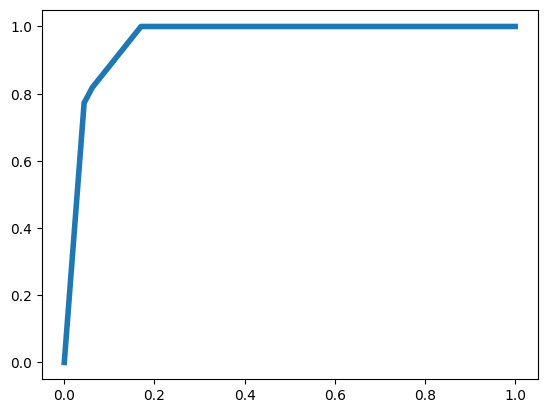

In [291]:
# retrain the model
best_model = DecisionTreeClassifier(**clf.best_params_).fit(X_train, y_train)
y_pred_test = best_model.predict(X_test)
y_pred_test_prob = best_model.predict_proba(X_test)[:, 1]

print('precision:', np.round(precision_score(y_test, y_pred_test), 3))
print('roc_auc:', np.round(roc_auc_score(y_test, y_pred_test_prob), 3))
print('log_loss:', np.round(log_loss(y_test, y_pred_test_prob), 3))
print('accuracy:', np.round(accuracy_score(y_test, y_pred_test), 3))

fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_prob)
plt.plot(fpr, tpr, linewidth=4)
plt.show()

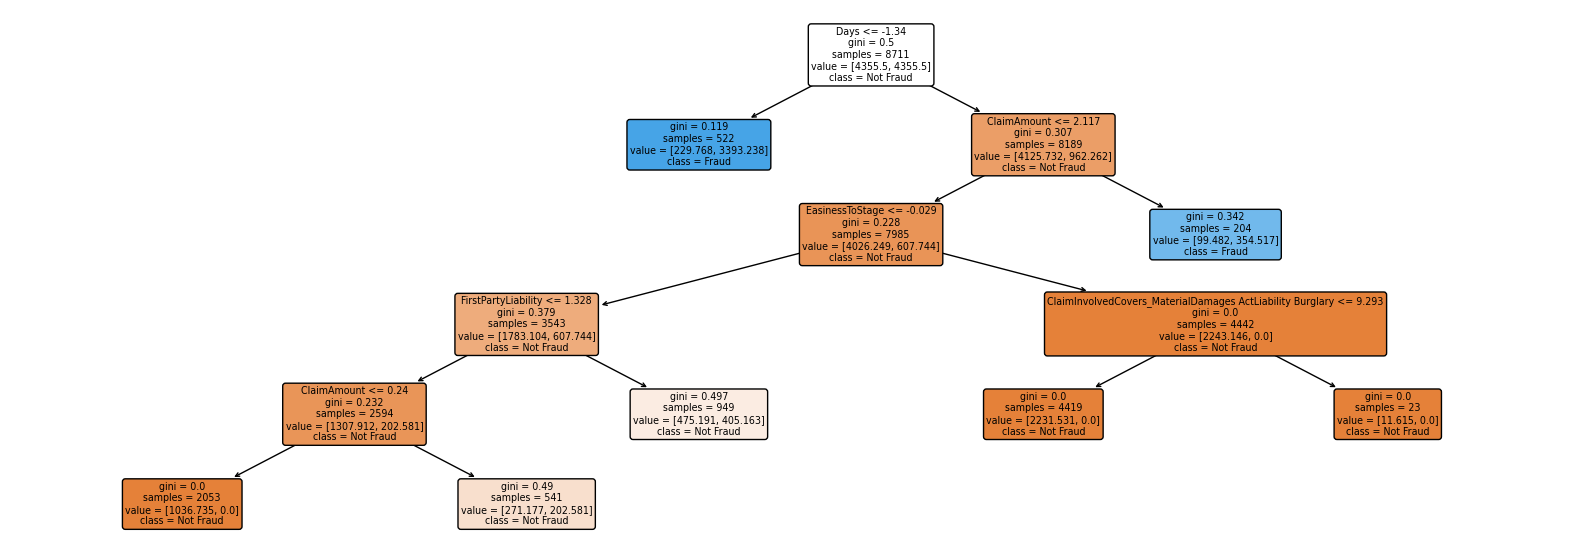

In [292]:
# Plot the tree
plt.figure(figsize=(20, 7))
plot_tree(best_model, feature_names=X_train.columns, filled=True, rounded=True, class_names=["Not Fraud","Fraud"])
plt.show()


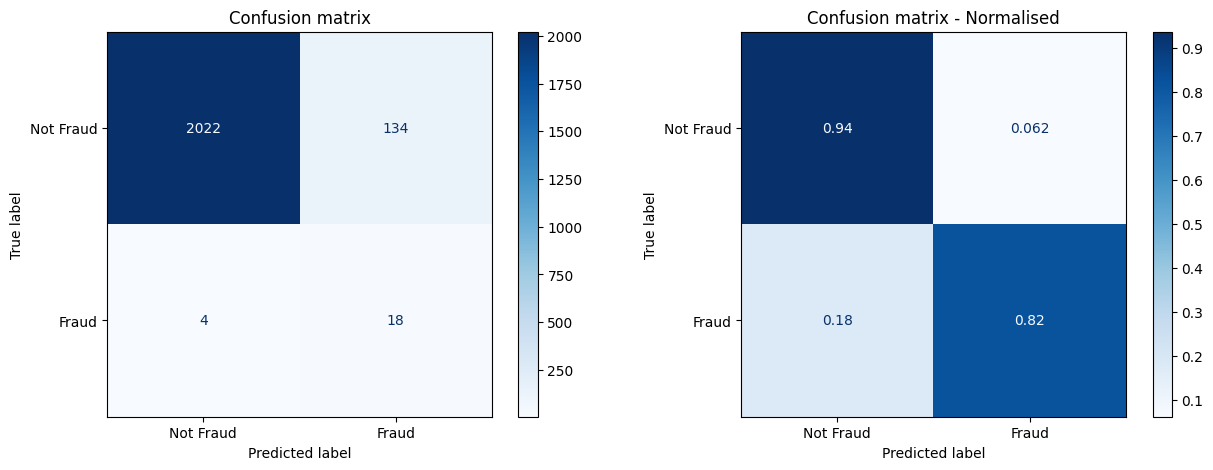

In [293]:
# Confusion matrix
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
cm = confusion_matrix(y_test, y_pred_test)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.from_predictions(y_test, y_pred_test, normalize=None, ax=axs[0], display_labels=['Not Fraud', 'Fraud'], cmap='Blues')
axs[0].set_title('Confusion matrix')
disp.from_predictions(y_test, y_pred_test, normalize='true', ax=axs[1], display_labels=['Not Fraud', 'Fraud'], cmap='Blues')
axs[1].set_title('Confusion matrix - Normalised')
plt.show()

In [294]:
# Final model
X_final = pd.concat([X_train, X_test], ignore_index=True)
y_final = pd.concat([y_train, y_test], ignore_index=True)

final_model = DecisionTreeClassifier(**clf.best_params_, random_state=42).fit(X_final, y_final)

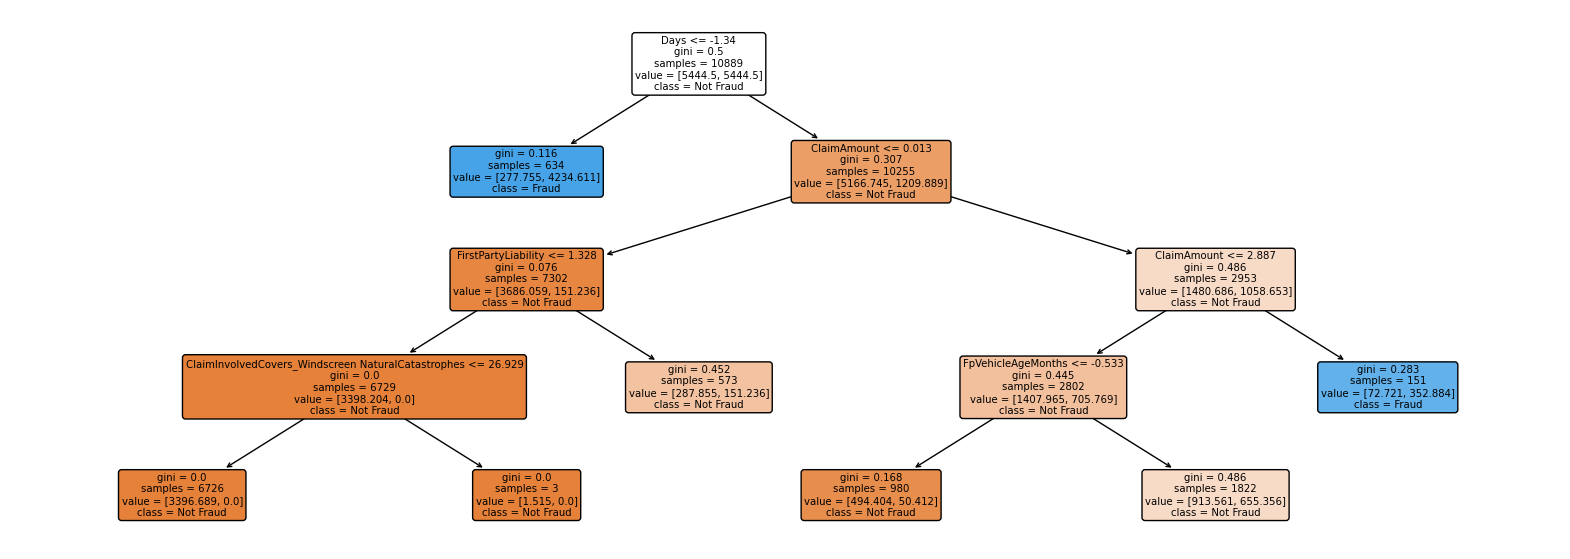

In [295]:
# Plot the final Decision tree model after retraining
plt.figure(figsize=(20, 7))
plot_tree(final_model, feature_names=X_train.columns, filled=True, rounded=True, class_names=["Not Fraud","Fraud"])
plt.show()

## Model 3 Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
test_data = df_insurance_claims_clean["Fraud"]
train_date = df_insurance_claims_clean.drop(columns = ["Fraud"])

In [ ]:
X = train_date
y = test_data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=120)

In [ ]:
random_forest_model = RandomForestClassifier(criterion = "entropy", max_features = "auto", random_state = 120)

In [ ]:
random_forest_model.fit(X_train, y_train)

In [ ]:
y_predict = random_forest_model.predict(X_test)
y_predict

In [ ]:
a = 0
b = 0
for i, o in zip(y_test, y_predict):
    if o == 1:
        a += 1
    if i == 1 & o == 1:
        b += 1

Decision_Tree_d = round((a / len(y_predict))*100, 2)
Decision_Tree_h = round((b / a)*100, 2)
        

In [ ]:
Decision_Tree_d

In [ ]:
Decision_Tree_h

## Model 4 Neural Network

In [ ]:
df_insurance_claims

In [ ]:
df_insurance_claims.info()

In [ ]:
df_insurance_claims_NN = df_insurance_claims.drop(columns = ["ReferenceId", 
                                                             "PolicyholderNumber", 
                                                             "FirstPartyVehicleNumber",
                                                             "ThirdPartyVehicleNumber",
                                                             "InsurerNotes",
                                                             "DamageImportance",
                                                             "ConnectionBetweenParties",
                                                             "LossPostCode",
                                                             "PolicyHolderPostCode",
                                                             "LossDate",
                                                             "FirstPolicySubscriptionDate"])

In [ ]:
df_insurance_claims_NN.info()

In [ ]:
df_insurance_claims_NN = df_insurance_claims_NN[(df_insurance_claims_NN.PolicyholderOccupation.notnull()) &
                                                (df_insurance_claims_NN.ClaimCause.notnull()) &
                                                (df_insurance_claims_NN.ClaimInvolvedCovers.notnull()) &
                                                (df_insurance_claims_NN.FirstPartyVehicleType.notnull()) &
                                                (df_insurance_claims_NN.FpVehicleAgeMonths.notnull()) &
                                                (df_insurance_claims_NN.LossHour.notnull()) & 
                                                (df_insurance_claims_NN.PolicyHolderAge.notnull())].reset_index()

In [ ]:
df_insurance_claims_NN.info()

In [ ]:
df_insurance_claims_NN["PolicyholderOccupation"] = pd.factorize(df_insurance_claims_NN.PolicyholderOccupation)[0]
df_insurance_claims_NN["ClaimCause"] = pd.factorize(df_insurance_claims_NN.ClaimCause)[0]
df_insurance_claims_NN["ClaimInvolvedCovers"] = pd.factorize(df_insurance_claims_NN.ClaimInvolvedCovers)[0]
df_insurance_claims_NN["FirstPartyVehicleType"] = pd.factorize(df_insurance_claims_NN.FirstPartyVehicleType)[0]

In [ ]:
df_insurance_claims_NN_final = df_insurance_claims_NN.drop(columns = ["index"])
df_insurance_claims_NN_final

In [ ]:
X = df_insurance_claims_NN_final.iloc[:,0:14]
y = df_insurance_claims_NN_final.iloc[:,14]

In [ ]:
X_train, X_other, y_train, y_other = train_test_split(X, y, train_size=0.7, random_state=345)
X_test, X_valid, y_test, y_valid = train_test_split(X_other, y_other, train_size = 0.5, random_state=123)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

### Before Tuning the hyperparameter

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])


In [ ]:
model.compile(optimizer=tf.keras.optimizers.experimental.SGD(learning_rate=0.01),
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [ ]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

In [ ]:
log = model.fit(X_train, y_train, epochs=100, batch_size=50, validation_data=(X_valid, y_valid), , callbacks=[early_stopping_cb])

In [ ]:
model.summary()

In [ ]:
plt.plot(log.history['loss'],label = "training loss")
plt.plot(log.history['val_loss'], label = "val loss")
plt.legend()
plt.show()

In [ ]:
plt.plot(log.history['accuracy'],label = "training accuracy")
plt.plot(log.history['val_accuracy'], label = "val_accuracy")
plt.legend()
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
y_predict = model.predict(X_test)
y_predict

### Tuning the hyperparameter

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
X = df_insurance_claims_NN_final.iloc[:,0:14]
y = df_insurance_claims_NN_final.iloc[:,14]

In [ ]:
X_train, X_other, y_train, y_other = train_test_split(X, y, train_size=0.7, random_state=345)
X_test, X_valid, y_test, y_valid = train_test_split(X_other, y_other, train_size = 0.5, random_state=123)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [ ]:
def train_model(hp):
    num_units = hp.Int('num_units', min_value = 1, max_value=20) 
    dropout_rate = hp.Float('dropout_rate', min_value = 0.2, max_value = 0.5)
    learning_rate = hp.Float('learning_rate', min_value = 0.01, max_value = 0.05, sampling = 'log')
    
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(num_units, activation="relu"),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(num_units, activation="relu"),
        tf.keras.layers.Dense(1, activation="sigmoid")
    ])
    
    model.compile(optimizer=tf.keras.optimizers.experimental.RMSprop(learning_rate = learning_rate),
                  loss='binary_crossentropy',
                  metrics = ["accuracy"])
    
    return model

In [ ]:
tuner = kt.Hyperband(train_model,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='logs',
                     project_name='NN_mdoel_final')    

In [ ]:
tuner.search(X_train, y_train, validation_data=(X_valid,y_valid))

In [ ]:
best_hps = tuner.get_best_hyperparameters()[0]
print("Best number of hidden units:", best_hps['num_units'])
print("Best dropout rate:", best_hps['dropout_rate'])
print("Best learning rate:", best_hps['learning_rate'])

In [ ]:
best_model = tuner.hypermodel.build(best_hps)

In [ ]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

In [ ]:
log = best_model.fit(X_train, y_train, epochs=30, batch_size = 50, validation_data=(X_valid,y_valid), callbacks=[early_stopping_cb])

In [ ]:
best_model.summary()

In [ ]:
plt.plot(log.history['loss'],label = "training loss")
plt.plot(log.history['val_loss'], label = "val loss")
plt.legend()
plt.show()

In [ ]:
plt.plot(log.history['accuracy'],label = "training accuracy")
plt.plot(log.history['val_accuracy'], label = "val_accuracy")
plt.legend()
plt.show()

## Model 5 Nerual Network Autoencode

In [ ]:
df_insurance_claims_NNA = df_insurance_claims_NN_final.drop(columns = ["Fraud"])
df_insurance_claims_NNA 

In [ ]:
X = df_insurance_claims_NN_final.iloc[:,0:14]
y = df_insurance_claims_NN_final.iloc[:,0:14]

In [ ]:
X_train, X_other, y_train, y_other = train_test_split(X, y, train_size=0.7, random_state=345)
X_test, X_valid, y_test, y_valid = train_test_split(X_other, y_other, train_size = 0.5, random_state=123)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [ ]:
encoder = tf.keras.Sequential([tf.keras.layers.Dense(7, activation="relu")], name='encoder')

In [ ]:
decoder = tf.keras.Sequential([tf.keras.layers.Dense(14, activation="softmax")], name='decoder')

In [ ]:
autoencoder = tf.keras.Sequential([encoder,decoder])

In [ ]:
autoencoder.compile(optimizer='rmsprop',
                    loss='mean_squared_error',
                    metrics=['accuracy'])

In [ ]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

In [ ]:
log = autoencoder.fit(x=X_train, y=X_train, epochs=50, batch_size=64, validation_data=(X_valid, X_valid), callbacks=[early_stopping_cb])

In [ ]:
plt.plot(log.history['loss'],label = "training loss")
plt.plot(log.history['val_loss'], label = "val loss")
plt.legend()
plt.show()

In [ ]:
autoencoder.summary()